# Weather Model
### Application of Markov Model & HMM. 

Please do not use viterbi algorithm. You may need to install __pomegranate__

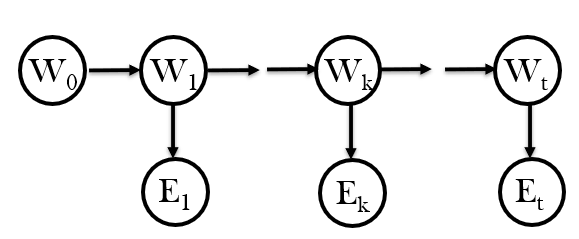

Denote the hidden states of the HMM by $W_i$ (start with $W_0$) and the observations (evidence) by $E_i$ (start with $E_1$). $W_i$ would be either sunny, rainy, or foggy, and $E_i$ is yes or no to indicate if an umbrella was observed. 

We will use this model with prior probabilities(__P_init__) 
- P(sunny) = 1/7, P(rainy) = 2/7, P(foggy) = 4/7. 

The remaining probilities are specified below in the emisssion(__P_emission__) and transition matrices(__P_transition__).

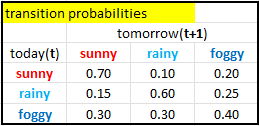

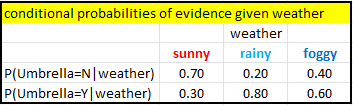

### <div class="alert alert-info"> State Transitions</div>
If today($W_0$) is __rainy__ what is the most likely forecast for the next two days if you have no umbrella observations to work with?

If no specified $W_0$, what is the most likely forecast for the next two days if you have no umbrella observations to work with? 

Please also address the probability for each scenario.

In [ ]:

import numpy as np

P_transition = np.array([[0.70, 0.10, 0.20],   # Tomorrow's predictions if today = sunny
                         [0.15, 0.60, 0.25],   # Tomorrow's predictions if today = rainy
                         [0.30, 0.30, 0.40] ]) # Tomorrow's predictions if today = foggy

P_init = np.array([1/7, 2/7, 4/7])

In [7]:
# Your answer here
# Lets create a function to predict the weather for the next day
def forecast(current_weather, P_transition):
    return np.argmax(P_transition[current_weather])

# Lets create a function to calculate the probability 
def forecast_probability(current_weather, P_transition):
    next_weather = most_likely_forecast(current_weather, P_transition)
    return P_transition[current_weather, next_weather]

# If rainy then 1
today_weather = 1 
next_day_weather = forecast(today_weather, P_transition)
next_day_probability = forecast_probability(today_weather, P_transition)

# Forecast for the day after tomorrow
next_next_day_weather = forecast(next_day_weather, P_transition)
next_next_day_probability = forecast_probability(next_day_weather, P_transition)

#calculate the most likely forecast based on initial probabilities
initial_forecast = np.argmax(P_init)
first_day_forecast = forecast(initial_forecast, P_transition)
first_day_probability = forecast_probability(initial_forecast, P_transition)

second_day_forecast = forecast(first_day_forecast, P_transition)
second_day_probability = forecast_probability(first_day_forecast, P_transition)


print(f"Next day weather if today is rainy {next_day_weather}")
print(f"Next day probability if today is rainy {next_day_probability:.2f}")
print(f"Day after next weather if today is rainy {next_next_day_weather}")
print(f"Day after next probability if today is rainy {next_next_day_probability:.2f}")
print(f"First day forecast if W0 not specified {first_day_forecast}")
print(f"First day probability if W0 not specified {first_day_probability:.2f}")
print(f"Second day forecast if W0 not specified {second_day_forecast}")
print(f"Second day probability if W0 not specified {second_day_probability:.2f}")

Next day weather if today is rainy 1
Next day probability if today is rainy 0.60
Day after next weather if today is rainy 1
Day after next probability if today is rainy 0.60
First day forecast if W0 not specified 2
First day probability if W0 not specified 0.40
Second day forecast if W0 not specified 2
Second day probability if W0 not specified 0.40


### <div class="alert alert-info">[GRADED  TASK 2.2] Emission Probabilities</div>
If on the first day you see umbrella ($E_1$ = "umbrella"), what is the probability that it is foggy, rainy, or sunny?

What is the most likely weather (hidden state)?

In [ ]:


# Emission probabilities
P_emission = np.array([[0.30, 0.70],  
                       [0.20, 0.80],  
                       [0.60, 0.40]]) 
# Umbrella = Yes
umbrella_seen = 1  

# Prior probabilities (initial state)
prior_probability = P_init

# Likelihood: P(Umbrella | Weather)
likelihood = P_emission[:, umbrella_seen]

# Evidence: P(Umbrella)
evidence = np.sum(likelihood * prior_probability)

# Posterior probabilities: P(Weather | Umbrella)
posterior_probs = (likelihood * prior_probability) / evidence
most_likely_weather = np.argmax(posterior_probs)

print("Posterior probabilities (P(Weather | Umbrella)):", posterior_probs)
print("Most likely weather (hidden state):", most_likely_weather)

Posterior probabilities (P(Weather | Umbrella)): [0.17948718 0.41025641 0.41025641]
Most likely weather (hidden state): 1


### <div class="alert alert-info"> Filtering</div>
Given the following observation sequence $E_1, E_2, E_3, E_4, E_5, E_6, E_7$
- $E = [E_1, E_2, E_3, E_4, E_5, E_6, E_7]$ = ["umbrella", "no umbrella", "umbrella", "umbrella", "umbrella", "umbrella", "no umbrella"] 

What is the final state and the most likely weather?

In [ ]:


E = ["umbrella", "no umbrella", "umbrella", "umbrella", "umbrella", "umbrella"]


obs_map = {"no umbrella": 0, "umbrella": 1}
obs = [obs_map[e] for e in E]

# Initialize belief state 
belief = P_init


for o in obs:
    # apply the transition model
    belief = np.dot(P_transition.T, belief)
    
    # apply the emission model
    belief = belief * P_emission[:, o]
    
    # Normalize the belief state
    belief = belief / np.sum(belief)

# Final state 
final_state = belief

# Most likely weather (hidden state)
most_likely_weather = np.argmax(final_state)

final_state, most_likely_weather

(array([0.44502614, 0.40261085, 0.15236301]), 0)

### <div class="alert alert-info"> Most Likely Explanation</div>
Given the same observation sequence $E_1, E_2, E_3, E_4, E_5, E_6, E_7$ as Task 2.3,
what is the most likely sequence of state to have generated those observations?

In [ ]:



E = ["umbrella", "no umbrella", "umbrella", "umbrella", "umbrella", "umbrella", "no umbrella"]


obs_map = {"no umbrella": 0, "umbrella": 1}
obs = [obs_map[e] for e in E]

# No of states
number_of_states = P_transition.shape[0]

# No of observations
number_of_obs = len(obs)

# Initializing Viterbi algorithm 
viterbi = np.zeros((number_of_states, number_of_obs))
backpointer = np.zeros((number_of_states, number_of_obs), dtype=int)


viterbi[:, 0] = P_init * P_emission[:, obs[0]]

# Applying Viterbi algorithm recursion
for t in range(1, number_of_obs):
    for s in range(number_of_states):
        transition_probs = viterbi[:, t-1] * P_transition[:, s]
        max_transition_prob = np.max(transition_probs)
        viterbi[s, t] = max_transition_prob * P_emission[s, obs[t]]
        backpointer[s, t] = np.argmax(transition_probs)

# Termination
best_last_state = np.argmax(viterbi[:, -1])
best_path_prob = np.max(viterbi[:, -1])

# Path backtracking
best_path = np.zeros(number_of_obs, dtype=int)
best_path[-1] = best_last_state
for t in range(number_of_obs-2, -1, -1):
    best_path[t] = backpointer[best_path[t+1], t+1]

best_path, best_path_prob

(array([2, 2, 0, 0, 0, 0, 0]), 0.0002846164607999998)